In [2]:
%load_ext autoreload
%autoreload 2
import matplotlib as mpl
%matplotlib inline
import scipy as sp
import numpy as np
import pandas as pd
# sometimes order maters on these
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import oBehave.plotting_stuff as obps
import oBehave.helperfunctions as obhf
import oBehave.neural_analysis as obna
import oBehave.behavior_anaylsis as obba
import sklearn.decomposition as decomp


from visual_behavior.ophys.dataset.visual_behavior_ophys_dataset import VisualBehaviorOphysDataset
from visual_behavior.ophys.response_analysis.utilities import get_trace_around_timepoint,get_nearest_frame
from visual_behavior.ophys.response_analysis.response_analysis import ResponseAnalysis

experiment_id = 639438856

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
manifest = obhf.load_manifest()
obba.includeNovelSession(manifest)
dataset= VisualBehaviorOphysDataset(experiment_id=experiment_id, cache_dir=obhf.drive_path)
analysis = ResponseAnalysis(dataset)

loading trial response dataframe
loading flash response dataframe


In [8]:
num_trials = len(dataset.stimulus_table)
num_cells = len(dataset.cell_indices)
fr = analysis.flash_response_df
response_array = np.empty((num_trials,num_cells))
for i in range(num_trials):
    response_array[i,:] = fr[fr.flash_number==i].mean_response.values

In [110]:
PCA = decomp.PCA()
X = PCA.fit_transform(response_array-response_array.mean())

In [111]:
#FR = obba.includeAddRepeats(dataset.stimulus_table,dataset.all_trials)
FR.head()

,flash_number,start_time,end_time,image_name,repeats,block,response_type
0,0,176.04241,176.29254,im115,1.0,1.0,None
1,1,176.79298,177.04297,im115,2.0,1.0,None
2,2,177.54338,177.79360,im115,3.0,1.0,None
3,3,178.29403,178.54427,im115,4.0,1.0,None
4,4,179.04458,179.29492,im115,5.0,1.0,None


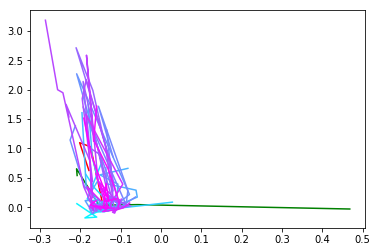

In [134]:
#plt.plot(PCA.explained_variance_ratio_,'.')
unique_blocks = np.unique(FR['block'])
unique_image = np.unique(FR['image_name'])
cmap = mpl.cm.get_cmap('cool')
cc = cmap(np.linspace(0,1,len(unique_blocks)))
counter = 0
for ii in range(1,len(unique_blocks)):
    if unique_image[5] == (FR[FR['block']==ii]['image_name'].values[0]):
        if counter == 0:
            plt.plot(X[FR['block']==ii,0][:5],X[FR['block']==ii,1][:5],color = 'green')
            counter +=1
        elif counter == 1:
            plt.plot(X[FR['block']==ii,0][:5],X[FR['block']==ii,1][:5],color = 'red')
            counter +=1

        else:
            plt.plot(X[FR['block']==ii,0][:5],X[FR['block']==ii,1][:5],color = cc[ii,:])


TypeError: ufunc 'add' did not contain a loop with signature matching types dtype('S32') dtype('S32') dtype('S32')

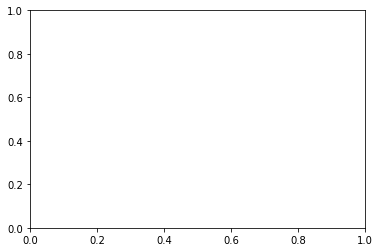

In [145]:
obps.dffBlockPlot(dataset.dff_traces[58,:],dataset.timestamps_ophys,dataset.stimulus_table,window = (0.,.75),framerate = dataset.metadata.ophys_frame_rate)

0